In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel('/content/comment sentiment (masking).xlsx')
df

,id,content,author,target,label
0,0,สองคนนี้แม่งแจกชิบหายแพ้เพราะมันสองคนเนี่ย เมื...,User1,NaN,neg
1,1,แต่คุณตาย 16 นะ,User2,User1,neg
2,2,User2 แค่16ตัวเอง,User1,User2,neu
3,3,User1 แล้วแจกมั้ยงะ,User3,User1,neg
4,4,User3 ไม่แจกตายเพื่อทีม,User1,User3,neg
...,...,...,...,...,...
472,472,Fuji Rin ก็เมื่อกี้เห็นเขามีอยู่แค่นั้นไหมหล่ะ...,User103,User158,neg
473,473,User157 ขอดิสได้ไหมครับ,User159,User157,neu
474,474,User159 https://discord.gg/KHcNPCgV4R,User103,User159,neu
475,475,พูดได้มั้ยพี่จี้,User45,User103,neu


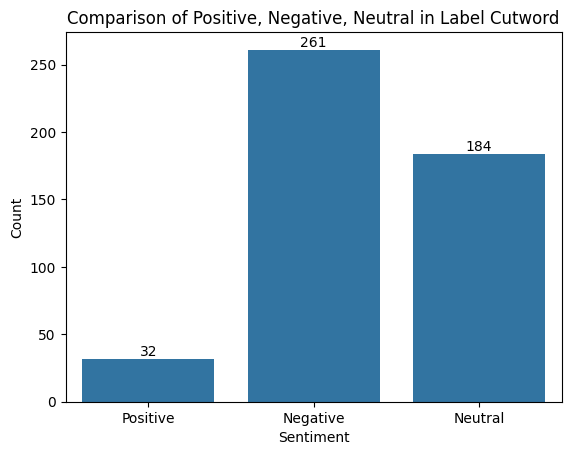

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count_all_match = [sum(df['label'] == 'pos'), sum(df['label'] == 'neg'),
                   sum(df['label'] == 'neu')]
labels = ['Positive', 'Negative', 'Neutral']

ax = sns.barplot(x=labels, y=count_all_match)

for i, v in enumerate(count_all_match):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison of Positive, Negative, Neutral in Label Cutword')

# แสดงกราฟ
plt.show()

In [ ]:
import pandas as pd
data_toxic_words = pd.read_csv('neg_words.txt', header=None, names=['text'])
data_positive_word = pd.read_csv('pos_words.txt', header=None, names=['text'])

In [ ]:
pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 39.3 MB/s eta 0:00:00


# CutWord

In [ ]:
import pythainlp
from pythainlp.corpus.common import thai_words
from pythainlp import Tokenizer

toxic_words = []
positive_word = []
toxic_words.extend(data_toxic_words.values.flatten())
positive_word.extend(data_positive_word.values.flatten())

words = set(thai_words())  # thai_words() returns frozenset
words.update(toxic_words)
words.update(positive_word)
custom_tokenizer = Tokenizer(words)

In [ ]:
toxic_words = list(set(toxic_words))
positive_word = list(set(positive_word))

In [ ]:
import re
def custom_token(text):
    text = re.sub(r'[^\u0E00-\u0E7Fa-zA-Z0-9\s]', '', text) # remove special characters and emojis
    text = re.sub(r'\s+', ' ', text) # remove extra whitespace
    text = re.sub(r':[a-z_]+:', '', text) # remove all emoji
    text = text.strip() # remove leading and trailing whitespace
    tokens = custom_tokenizer.word_tokenize(text)
    return tokens

In [ ]:
df['tokens'] = df['content'].apply(custom_token)
df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
# Function to check if any toxic word is contained in the tokens
def check_toxic_words(tokens):
    return list(set([word for word in tokens.split() if word in toxic_words]))
def count_toxic_words(tokens):
    unique_toxic_words = list(set([word for word in tokens.split() if word in toxic_words]))
    count = len(unique_toxic_words)
    return count

# check for toxic words
df['count_negative'] = df['tokens'].apply(count_toxic_words)
df['ToxicWords'] = df['tokens'].apply(check_toxic_words)

In [ ]:
# Function to check if any toxic word is contained in the tokens
def check_positive_words(tokens):
    return list(set([word for word in tokens.split() if word in positive_word]))
def count_positive_words(tokens):
    unique_positive_words = list(set([word for word in tokens.split() if word in positive_word]))
    count = len(unique_positive_words)
    return count

# check for toxic words
df['count_positive'] = df['tokens'].apply(count_positive_words)
df['PositiveWords'] = df['tokens'].apply(check_positive_words)

In [ ]:
df['label_CutWord'] = ''

In [ ]:
df.loc[(df['count_negative'] > df['count_positive']), 'label_CutWord'] = 'neg'
df.loc[(df['count_negative'] < df['count_positive']), 'label_CutWord'] = 'pos'
df.loc[(df['count_negative'] == df['count_positive']), 'label_CutWord'] = 'neu'

In [ ]:
df

,id,content,author,target,label,tokens,count_negative,ToxicWords,count_positive,PositiveWords,label_CutWord
0,0,สองคนนี้แม่งแจกชิบหายแพ้เพราะมันสองคนเนี่ย เมื...,User1,NaN,neg,สอง คน นี้ แม่ง แจก ชิบหาย แพ้ เพราะ มัน สอง ค...,3,"[แจก, ชิบหาย, แม่ง]",0,[],neg
1,1,แต่คุณตาย 16 นะ,User2,User1,neg,แต่ คุณ ตาย 16 นะ,1,[ตาย],0,[],neg
2,2,User2 แค่16ตัวเอง,User1,User2,neu,User 2 แค่ 16 ตัวเอง,0,[],0,[],neu
3,3,User1 แล้วแจกมั้ยงะ,User3,User1,neg,User 1 แล้ว แจก มั้ย งะ,1,[แจก],0,[],neg
4,4,User3 ไม่แจกตายเพื่อทีม,User1,User3,neg,User 3 ไม่ แจก ตาย เพื่อ ทีม,2,"[แจก, ตาย]",0,[],neg
...,...,...,...,...,...,...,...,...,...,...,...
472,472,Fuji Rin ก็เมื่อกี้เห็นเขามีอยู่แค่นั้นไหมหล่ะ...,User103,User158,neg,Fuji Rin ก็ เมื่อกี้ เห็น เขา มี อยู่ แค่น...,1,[เดือดร้อน],0,[],neg
473,473,User157 ขอดิสได้ไหมครับ,User159,User157,neu,User 157 ขอ ดิส ได้ ไหม ครับ,0,[],0,[],neu
474,474,User159 https://discord.gg/KHcNPCgV4R,User103,User159,neu,User 159 httpsdiscordggKHcNPCgV 4 R,0,[],0,[],neu
475,475,พูดได้มั้ยพี่จี้,User45,User103,neu,พูด ได้ มั้ย พี่ จี้,0,[],0,[],neu


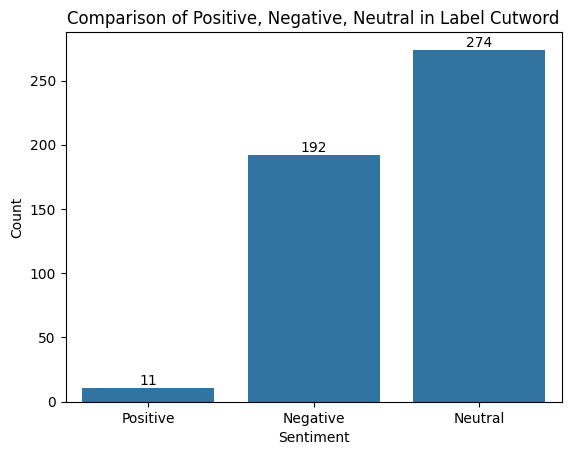

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count_all_match = [sum(df['label_CutWord'] == 'pos'), sum(df['label_CutWord'] == 'neg'),
                   sum(df['label_CutWord'] == 'neu')]
labels = ['Positive', 'Negative', 'Neutral']

ax = sns.barplot(x=labels, y=count_all_match)

for i, v in enumerate(count_all_match):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison of Positive, Negative, Neutral in Label Cutword')

# แสดงกราฟ
plt.show()

In [ ]:
sum(df['label'] == df['label_CutWord'])

326

In [ ]:
sum(df['label'] == df['label_CutWord']) / len(df['label_CutWord']) * 100

68.34381551362684

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

df['tokens'].fillna('', inplace=True)

# Create a TF-IDF vectorizer
vectorizer = CountVectorizer()

# Convert text data to feature vectors
X = vectorizer.fit_transform(df['tokens'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label_CutWord'], test_size=0.3, random_state=42)

In [ ]:
# Create and train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on the testing set
y_pred = model_lr.predict(X_test)

In [ ]:
accuracy_lr_cut = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lr_cut)

Accuracy: 0.8055555555555556


In [ ]:
f1_lr_cut = f1_score(y_test, y_pred, average='macro')
print("f1:", f1_lr_cut)

f1: 0.5285859024460848


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         neg       0.77      0.71      0.73        51
         neu       0.82      0.88      0.85        91
         pos       0.00      0.00      0.00         2

    accuracy                           0.81       144
   macro avg       0.53      0.53      0.53       144
weighted avg       0.79      0.81      0.80       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier(verbose=False)
model_cb.fit(X_train, y_train)

In [ ]:
# Predict on the testing set
y_pred = model_cb.predict(X_test)

In [ ]:
accuracy_cb_cut = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_cb_cut)

Accuracy: 0.8194444444444444


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         neg       0.79      0.73      0.76        51
         neu       0.84      0.89      0.86        91
         pos       0.00      0.00      0.00         2

    accuracy                           0.82       144
   macro avg       0.54      0.54      0.54       144
weighted avg       0.81      0.82      0.81       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create and train the SVM classifier
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predict on the testing set
y_pred = model_svm.predict(X_test)

In [ ]:
accuracy_svm_cut = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm_cut)

Accuracy: 0.7847222222222222


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         neg       0.73      0.69      0.71        51
         neu       0.83      0.86      0.84        91
         pos       0.00      0.00      0.00         2

    accuracy                           0.78       144
   macro avg       0.52      0.51      0.52       144
weighted avg       0.78      0.78      0.78       144



# Weight Label

In [ ]:
dict_score = {"อีควาย":-3, "จิ๋ม":-3, "ไอ้ส้นตีน":-3, "ปลวก":-1, "กระจุกกระจิก":-1,
"แย่มาก":-3, "กดขี่":-2, "ขึ้แตก":-2, "ขี้ขลาดตาขาว":-2, "ฟักยู":-3, "ทราม":-2,
"บ่อนทำลาย":-3, "แย่จัง":-3, "อีปลาเงือก":-3, "ข่มขวัญ":-1, "ขายตัว":-3, "ไอ้ขึ้หมา":-2,
"กวนตีน":-3, "ทมิฬ":-3, "คอร์รัปชัน":-2, "เสแสร้ง":-1, "ไอ้บ้า":-1, "ขายขี้หน้า":-2,
"กระดอ":-3, "อีอับปรี":-2, "แย่":-2, "ทุจริต":-2, "อีเหี้ย":-3, "แซะ":-1, "ฆ่าแกง":-3, "โกหก":-1,
"เบี๊อก":-2, "เอ๋อ":-2, "มึง":-1, "เสือก":-3, "เจี๊ยว":-1, "ฟัค":-3, "เกเร":-2, "ต่ำตม":-3,
"ย่ำแย่":-3, "เหี้ย":-3, "พ่อง":-3, "อีกะหรี":-3, "ซ้ำร้าย":-2, "แมงดา":-3, "ดูถูก":-1,
"หน้าโง่":-3, "ชั่งแม่ง":-3, "ตอแหล":-3, "แม่ง":-3, "ห่วย":-3, "ฟาย":-3, "เยสเเม่":-3,
"เสือกพะยูน":-3, "เหียก":-1, "อีหมา":-2, "ขัดใจ":-1, "ดูหมิ่น":-2, "พ่อมึง":-3, "อีห่า":-3,
"แทงกัน":-3, "ร้าย":-1, "ทุบตี":-2, "ไอสัด":-3, "โสโครก":-3, "ขัดขืน":-2, "ตัวแสบ":-1,
"กลั่นแกล้ง":-2, "วะ":-1, "คดโกง":-2, "อุบาทว์":-3, "โหดร้าย":-2, "กล่าวหา":-1, "เฉโก":-1,
"สัส":-3, "ไอ้เวร":-3, "ไอ้หมา":-3, "หรรม":-2, "เบื่อหน้า":-2, "บ้า":-1, "ฆ่า":-3,
"สันดาน":-3, "ลูกโสเภณี":-3, "ไม่เจียมกะลาหัว":-3, "แตด":-2, "ทะลึ่ง":-2, "เพี้ยน":-1,
"ขโมย":-2, "ประจาร":-2, "กวาดล้าง":-2, "ความขุ่นเคือง":-2, "เงี่ยน":-3, "เบื๊อก":-2,
"หน้าส้นตีน":-3, "แค้น":-2, "หน้าตัวเมืย":-3, "เสื่อมเสีย":-2, "ตราหน้า":-2, "เสียใจ":-1,
"กดราคา":-1, "ต่ำต้อย":-2, "ข่ม":-1, "หน้าควย":-3, "ตำหนิ":-2, "ปี้กัน":-3, "วิกฤติ":-2,
"ฉิบหาย":-3, "ปาราชิก":-1, "ล้าสมัย":-2, "มารศาสนา":-3, "รุกรุย":-1, "กระทำชำเรา":-3,
"อีสัตว์":-3, "ไอ้สัตว์":-3, "แม่มึงตาย":-3, "รุม":-1, "ชิงหมาเกิด":-2, "เกรียน":-1,
"เสื่อมโทรม":-3, "หำ":-2, "ไอเหี้ยหน้าหี":-3, "ลูกอีดอกทอง":-3, "ถุย":-1, "อีขี้ข้า":-3,
"มั่วนิ่ม":-2, "อีฟันหมาบ้า":-3, "ไอเหี้ย":-3, "เฆี่ยน":-2, "ไอ้ลาว":-3, "อีชาติชั่ว":-3,
"สิ้นสติ":-2, "กดดัน":-1, "แรด":-3, "เซ่อ":-2, "ปรัมปรา":-1, "ประชด":-2, "อีอ้วน":-3,
"xี":-3, "ไร้สาระ":-2, "ซวย":-2, "ถึงฆาต":-3, "อีดอกทอง":-3, "หน้าหี":-3, "ไม่ดี":-2,
"เกลียด":-2, "สับปลับ":-1, "ง่าว":-2, "ลำบาก":-2, "ไม่เอาไหน":-2, "ขืนใจ":-3,
"ขวางโลก":-3, "จู๋":-1, "กาก":-3, "อีร้อย":-1, "มั่ว":-2, "ฆ่าฟัน":-3, "แดก":-3,
"อีหน้าควาย":-3, "ประจาน":-2, "อื้อฉาว":-2, "โสมม":-2, "ปากเสีย":-2, "ชิงชัง":-2,
"ยิงกัน":-3, "อยากเอาหญิง":-3, "ดัดสันดาน":-3, "ไอเข้":-2, "ล่อกัน":-2, "อีช้างเย๊ด":-3,
"บกพร่อง":-2, "นรกแดกกบาล":-3, "ปากหมา":-3, "เนรคุณ":-3, "ทุเรศ":-3, "อีดำ":-3,
"ฆ่าล้างโคตร":-3, "ทรยศ":-2, "ความฉิบหาย":-3, "ห่า":-3, "อีดอก":-3, "ขัดแย้ง":-2,
"ตีกัน":-1, "จังไร":-3, "สะเหร่อ":-3, "อกตัญญู":-2, "กะหรี่":-3, "ขายชาติ":-3, "อีสัด":-3,
"ก่อกวน":-1, "ไอ้":-1, "บาดหมาง":-2, "กระจอก":-3, "อีหน้าหมา":-3, "ตัดพ้อ":-2,
"ด่า":-3, "โกง":-3, "พังพินาศ":-3, "หว่ะ":-1, "เปรต":-3, "บิดเบือน":-2, "ความชั่วช้า":-3,
"ร้ายกาจ":-2, "สาด":-3, "ความขมขื่น":-3, "ไอ้เวร":-3, "อีเวร":-3, "ไอเวร":-3,
"ปัญญาอ่อน":-3, "สาส":-3, "สัด":-3, "รังเกียจ":-3, "บรรลัย":-2, "โหดเหี้ยม":-3,
"อีชาติชั่ว":-3, "แม่มึง":-3, "เสร่อ":-3, "เยี่ยว":-3, "หมาบ้า":-2, "เซ็ง":-1, "ช้างเย็ด":-3, "เหี้ยมโหด":-3,
"ตาย":-3, "ควย":-3, "ชาติหมา":-3, "ขู่":-2, "เชี่ย":-3, "เดือดร้อน":-2, "ขายหน้า":-2,
"ประสาท":-3, "ไอ้สัตว์นรก":-3, "ตกม้าตาย":-3, "เห็บ":-2, "เศษนรก":-3, "เบียดเบียน":-2,
"จัญไร":-3, "เสนียด":-3, "เผด็จการ":-2, "ผิดหวัง":-2, "อีหน้าหี":-3, "ส้นตีน":-3,
"ประชดประชัน":-2, "เฮงซวย":-3, "ขี้":-3, "ขูดรีด":-2, "ข่มขืน":-3, "หน้าด้าน":-3,
"น่าเบื่อ":-2, "จรวย":-3, "ตบตา":-1, "อัปปรี":-3, "เบื่อ":-2, "แสรด":-3, "ชั่ว":-3,
"ตกนรกทั้งเป็น":-3, "ใจหมา":-3, "ด้อย":-2, "หี":-3, "สันหลังยาว":-2, "แช่ง":-3,
"ลูกอีสาด":-3, "ละเหี่ยใจ":-2, "มั่วซั่ว":-1, "โง่":-3, "นอกใจ":-2, "ข่มขู่":-2, "ดัดจริต":-2,
"พ่อมึงตาย":-3, "กวนส้นตีน":-3, "กระทืบ":-3, "ด่าทอ":-2, "กรี่":-3, "ไอ้สัส":-3,
"ฉุนเฉียว":-3, "สวะ":-3, "ผู้หญิงต่ำๆ":-3, "ไอ้ควาย":-3, "ร่าน":-3, "ฆ่ายกครัว":-3,
"ระยำ":-3, "เลว":-3, "เฉื่อย":-1, "กระทำอนาจาร":-3, "หมองมัว":-1, "ชาติชั่ว":-3,
"ลูกอีกะหรี่":-3, "สถุล":-3, "ควาย":-3, "ไม่ได้เรื่อง":-2, "ยัดแม่":-3, "เคราะห์ซ้ำกรรมซัด":-2,
"อีกระหรี่":-3, "ขู่เข็ญ":-2, "ขยะ":-3, "หงุดหงิด":-2, "ตายห่า":-3, "ชิปหาย":-3, "ชิบหาย":-3,
"รำคาญ":-2, "ลำคาน":-2, "อุบาท":-3, "ไม่มีปัญญา":-3, "ตุ๊ด":-3, "กระเทย":-3, "ngo":-3,
"ประสาทกิน":-3, "แจก":-1, "หัวร้อน":-2, "รวดเร็ว":2, "ได้ดี":2, "ไม่ผิดหวัง":2, "โครตดี":3, "โครตหมาะ":3,
"ไม่เคยผิดหวัง":3, "สบาย":2, "ยอดเยี่ยม":3, "Love":3, "ปลื้มปริ่ม":3, "ถูกใจ":2,
"รอบคอบ":2, "เร็ว":1, "ละเอียด":1, "ละมุน":1, "สุภาพ":1, "อร่อย":2, "อ่อนโยน":1,
"อัศจรรย์":3, "ดีใจ":3, "อุ่นใจ":2, "รัก":3, "ชอบ":3, "งดงาม":3, "แจ่ม":3, "แจ่มใส":3,
"ชัดแจ๋ว":1, "น่ารื่นรมย์":3, "น่ารัก":2, "ฉลาด":2, "อบอุ่น":1, "ความสุข":3, "สุข":3,
"ประทับใจ":3, "ซาบซึ้ง":2, "ภูมิใจ":2, "มหัศจรรย์ใจ":3, "มีความยินดี":3, "ผ่องใส":2,
"ยอดเยี่ยม":3, "เยี่ยม":3, "เยี่ยมยอด":3, "โดดเด่น":3, "รุ่ง":2, "รุ่งเรือง":2, "รุ่งโรจน์":2,
"ทันสมัย":2, "ล้ำเลิศ":2, "เสถียรภาพ":1, "เพลิดเพลิน":2, "น่านับถือ":2, "สดใส":2, "สบาย":2,
"สมจริง":1, "สมบูรณ์":2, "สร้างสรรค์":2, "สวย":2, "สวยงาม":3, "เหมาะเจาะ":2, "มีประโยชน์":2,
"สุขสันต์":3, "สนุก":3, "พอใจ":1, "น่าพอใจ":2, "น่าประทับใจ":3, "น่าพึงพอใจ":2, "น่าฟัง":2,
"น่าภาคภูมิใจ":3, "น่ามหัศจรรย์":3, "น่ายกย่อง":3, "น่ายินดี":3, "สนุกสนาน":3, "รวดเร็วทันใจ":2,
"ดีมาก":3, "สุดยอด":3
}

In [ ]:
dict_score = dict(dict_score)

In [ ]:
# Set the score of each word definition.
def def_score(df, dict_score):
    score = 0
    words = df.lower().split(" ")
    for word in words:
        if word in dict_score:
            score += int(dict_score[word])

    return score

In [ ]:
scores = []
for d in df['tokens']:
    score = def_score(d, dict_score)
    scores.append(score)

In [ ]:
# We create a new column 'definition_feeling_score' with score of each definition.
df['definition_feeling_score'] = scores

In [ ]:
df['weight_label'] = ''

In [ ]:
df.loc[df['definition_feeling_score'] > 0, 'weight_label'] = 'pos'
df.loc[df['definition_feeling_score'] < 0, 'weight_label'] = 'neg'
df.loc[df['definition_feeling_score'] == 0, 'weight_label'] = 'neu'

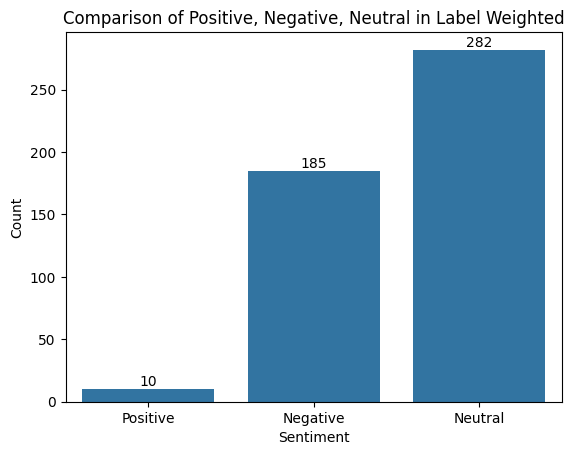

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count_all_match = [sum(df['weight_label'] == 'pos'), sum(df['weight_label'] == 'neg'),
                   sum(df['weight_label'] == 'neu')]
labels = ['Positive', 'Negative', 'Neutral']

ax = sns.barplot(x=labels, y=count_all_match)

for i, v in enumerate(count_all_match):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison of Positive, Negative, Neutral in Label Weighted')

# แสดงกราฟ
plt.show()

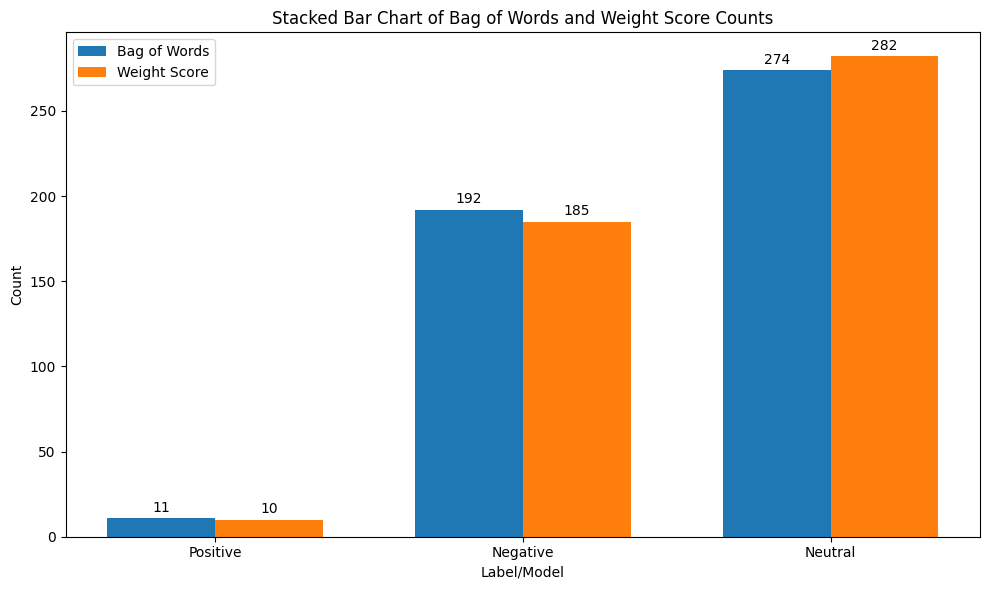

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {
    'Label/Model': ['Positive', 'Negative', 'Neutral'],
    'BoW': [11, 192, 274],
    'Ws': [10, 185, 282]
}

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(data['Label/Model']))

bar1 = ax.bar(index, data['BoW'], bar_width, label='Bag of Words')
bar2 = ax.bar([i + bar_width for i in index], data['Ws'], bar_width, label='Weight Score')

# Display values on top of each bar
for i, value in enumerate(data['BoW']):
    ax.text(i, value + 2, str(value), ha='center', va='bottom')

for i, value in enumerate(data['Ws']):
    ax.text(i + bar_width, value + 2, str(value), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Label/Model')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Bag of Words and Weight Score Counts')

# Set x-axis ticks
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(data['Label/Model'])

# Add a legend
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()


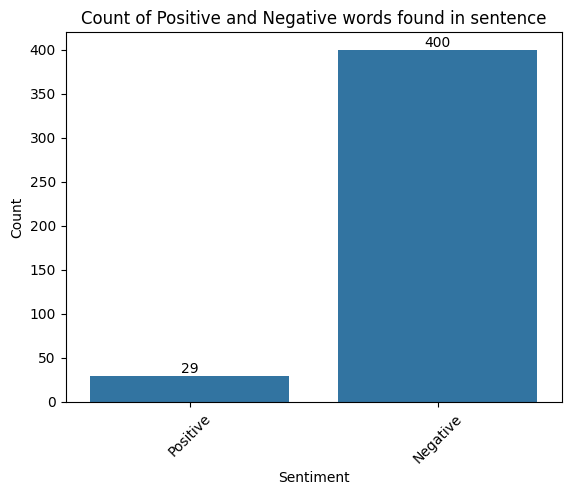

In [ ]:
count_all_match = [sum((df['count_positive'])),
                   sum((df['count_negative']))]
labels = ['Positive', 'Negative']

ax = sns.barplot(x=labels, y=count_all_match)

for i, v in enumerate(count_all_match):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Positive and Negative words found in sentence')

# แสดงกราฟ
plt.show()

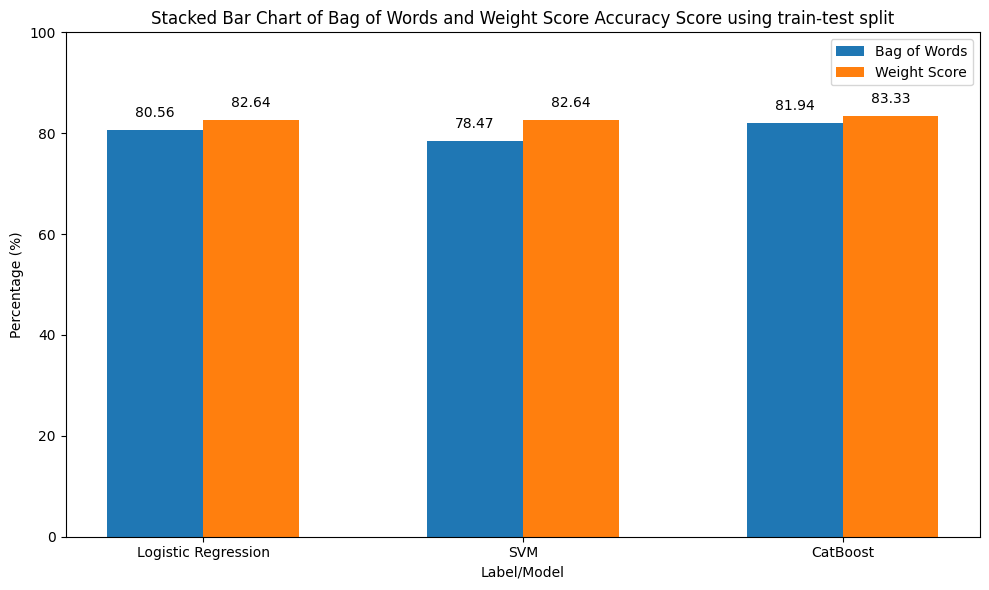

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {
    'Label/Model': ['Logistic Regression', 'SVM', 'CatBoost'],
    'BoW': [80.56, 78.47, 81.94],
    'Ws': [82.64, 82.64, 83.33]
}

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.30
index = range(len(data['Label/Model']))

bar1 = ax.bar(index, data['BoW'], bar_width, label='Bag of Words')
bar2 = ax.bar([i + bar_width for i in index], data['Ws'], bar_width, label='Weight Score')

# Display values on top of each bar
for i, value in enumerate(data['BoW']):
    ax.text(i, value + 2, str(value), ha='center', va='bottom')

for i, value in enumerate(data['Ws']):
    ax.text(i + bar_width, value + 2, str(value), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Label/Model')
ax.set_ylabel('Percentage (%)')
ax.set_title('Stacked Bar Chart of Bag of Words and Weight Score Accuracy Score using train-test split')

# Set x-axis ticks
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(data['Label/Model'])

ax.set_ylim(0, 100)

# Add a legend
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()


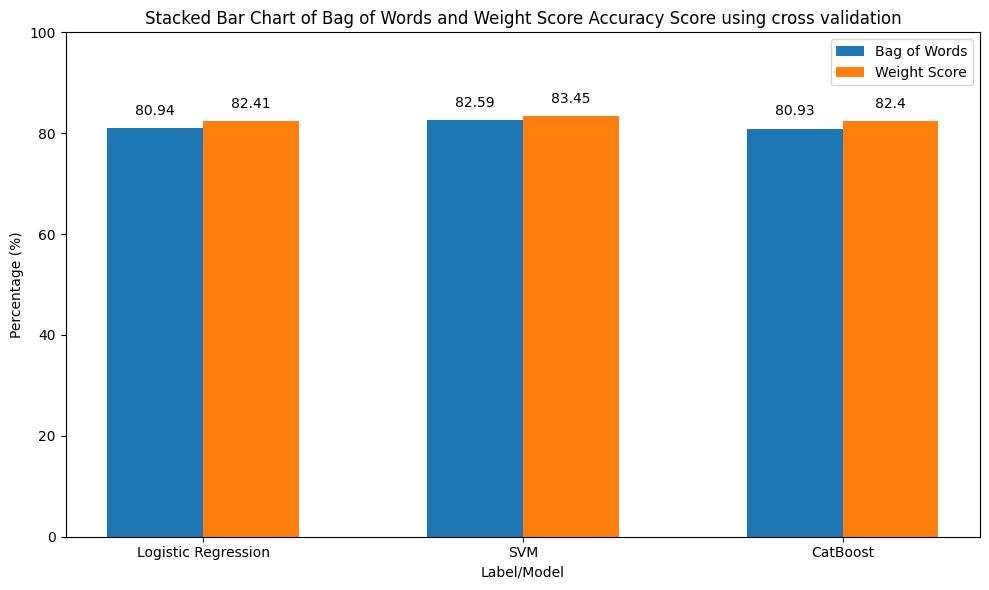

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {
    'Label/Model': ['Logistic Regression', 'SVM', 'CatBoost'],
    'BoW': [80.94, 82.59, 80.93],
    'Ws': [82.41, 83.45, 82.40]
}

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.30
index = range(len(data['Label/Model']))

bar1 = ax.bar(index, data['BoW'], bar_width, label='Bag of Words')
bar2 = ax.bar([i + bar_width for i in index], data['Ws'], bar_width, label='Weight Score')

# Display values on top of each bar
for i, value in enumerate(data['BoW']):
    ax.text(i, value + 2, str(value), ha='center', va='bottom')

for i, value in enumerate(data['Ws']):
    ax.text(i + bar_width, value + 2, str(value), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Label/Model')
ax.set_ylabel('Percentage (%)')
ax.set_title('Stacked Bar Chart of Bag of Words and Weight Score Accuracy Score using cross validation')

# Set x-axis ticks
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(data['Label/Model'])

ax.set_ylim(0, 100)

# Add a legend
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()


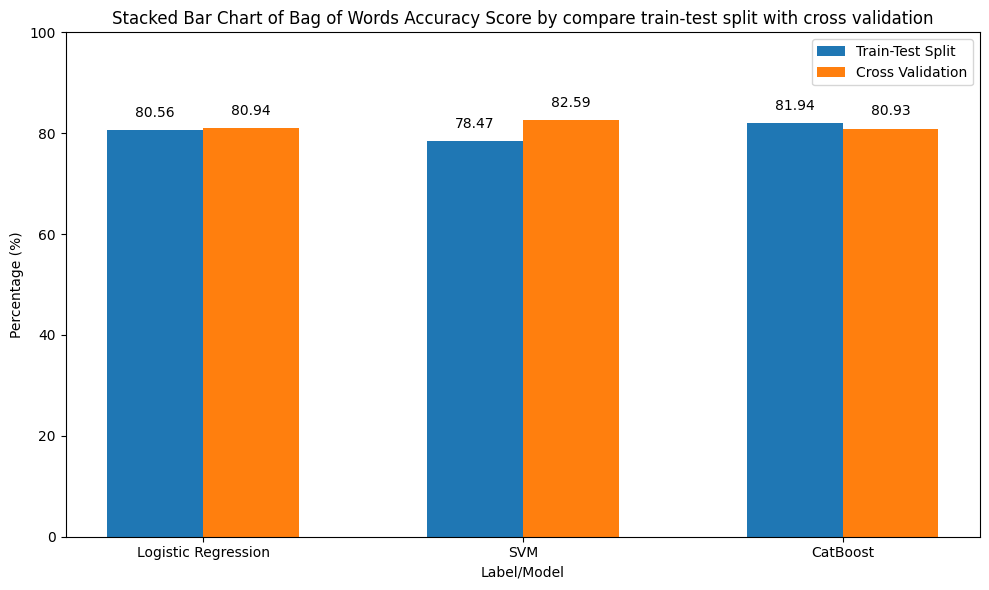

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {
    'Label/Model': ['Logistic Regression', 'SVM', 'CatBoost'],
    'train_test': [80.56, 78.47, 81.94],
    'cv': [80.94, 82.59, 80.93]
}

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.30
index = range(len(data['Label/Model']))

bar1 = ax.bar(index, data['train_test'], bar_width, label='Train-Test Split')
bar2 = ax.bar([i + bar_width for i in index], data['cv'], bar_width, label='Cross Validation')

# Display values on top of each bar
for i, value in enumerate(data['train_test']):
    ax.text(i, value + 2, str(value), ha='center', va='bottom')

for i, value in enumerate(data['cv']):
    ax.text(i + bar_width, value + 2, str(value), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Label/Model')
ax.set_ylabel('Percentage (%)')
ax.set_title('Stacked Bar Chart of Bag of Words Accuracy Score by compare train-test split with cross validation')

# Set x-axis ticks
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(data['Label/Model'])

ax.set_ylim(0, 100)

# Add a legend
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()


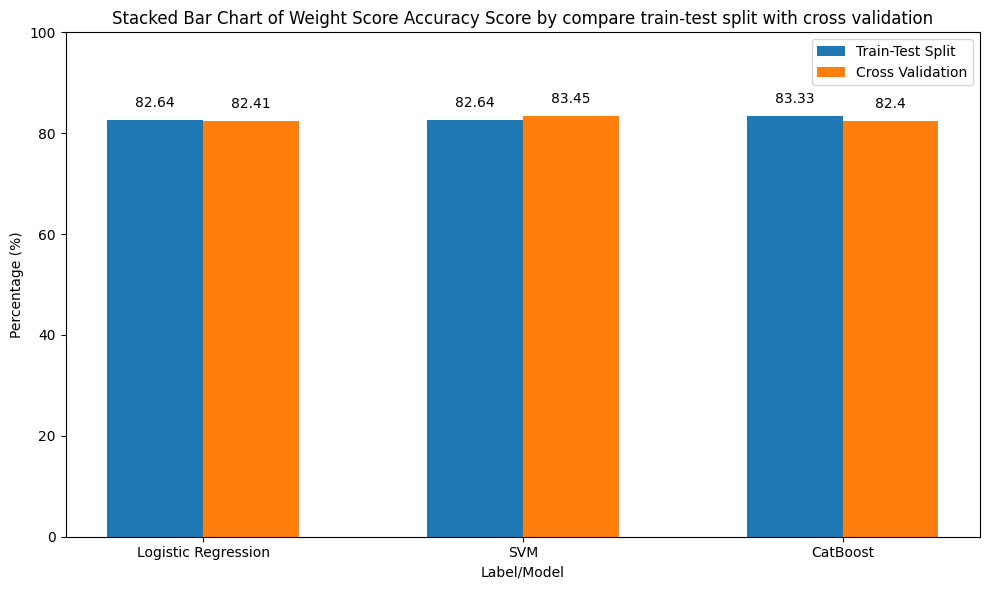

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {
    'Label/Model': ['Logistic Regression', 'SVM', 'CatBoost'],
    'train_test': [82.64, 82.64, 83.33],
    'cv': [82.41, 83.45, 82.40]
}

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.30
index = range(len(data['Label/Model']))

bar1 = ax.bar(index, data['train_test'], bar_width, label='Train-Test Split')
bar2 = ax.bar([i + bar_width for i in index], data['cv'], bar_width, label='Cross Validation')

# Display values on top of each bar
for i, value in enumerate(data['train_test']):
    ax.text(i, value + 2, str(value), ha='center', va='bottom')

for i, value in enumerate(data['cv']):
    ax.text(i + bar_width, value + 2, str(value), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Label/Model')
ax.set_ylabel('Percentage (%)')
ax.set_title('Stacked Bar Chart of Weight Score Accuracy Score by compare train-test split with cross validation')

# Set x-axis ticks
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(data['Label/Model'])

ax.set_ylim(0, 100)

# Add a legend
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()


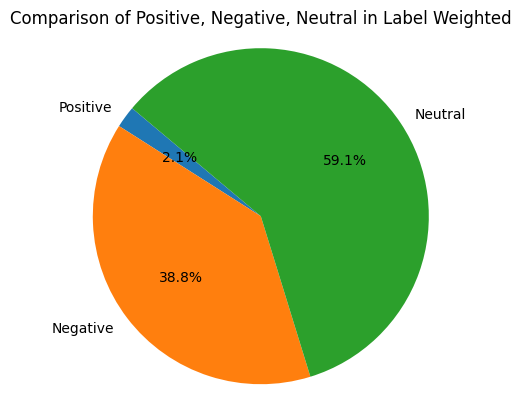

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame df is defined and ready to use

count_all_match = [sum(df['weight_label'] == 'pos'), sum(df['weight_label'] == 'neg'),
                   sum(df['weight_label'] == 'neu')]
labels = ['Positive', 'Negative', 'Neutral']

fig, ax = plt.subplots()

# Draw the pie chart
ax.pie(count_all_match, labels=labels, autopct='%1.1f%%', startangle=140)

ax.axis('equal') # Equal aspect ratio ensures that pie chart is drawn as a circle.

plt.title('Comparison of Positive, Negative, Neutral in Label Weighted')
plt.show()

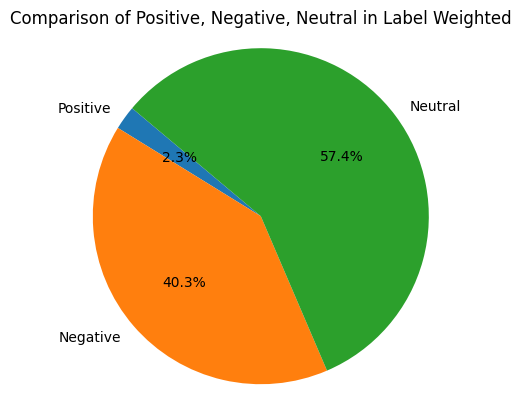

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame df is defined and ready to use

count_all_match = [sum(df['label_CutWord'] == 'pos'), sum(df['label_CutWord'] == 'neg'),
                   sum(df['label_CutWord'] == 'neu')]
labels = ['Positive', 'Negative', 'Neutral']

fig, ax = plt.subplots()

# Draw the pie chart
ax.pie(count_all_match, labels=labels, autopct='%1.1f%%', startangle=140)

ax.axis('equal') # Equal aspect ratio ensures that pie chart is drawn as a circle.

plt.title('Comparison of Positive, Negative, Neutral in Label Weighted')
plt.show()

In [ ]:
print(sum(df['label_CutWord'] == 'pos') + sum(df['weight_label'] == 'pos'))
print(sum(df['label_CutWord'] == 'neg') + sum(df['weight_label'] == 'neg'))
print(sum(df['label_CutWord'] == 'neu') + sum(df['weight_label'] == 'neu'))


21
377
556


In [ ]:
pip install pythainlp

In [ ]:
%matplotlib inline
# ติดตั้งฟ้อนภาษาไทย
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
import warnings
warnings.filterwarnings("ignore")

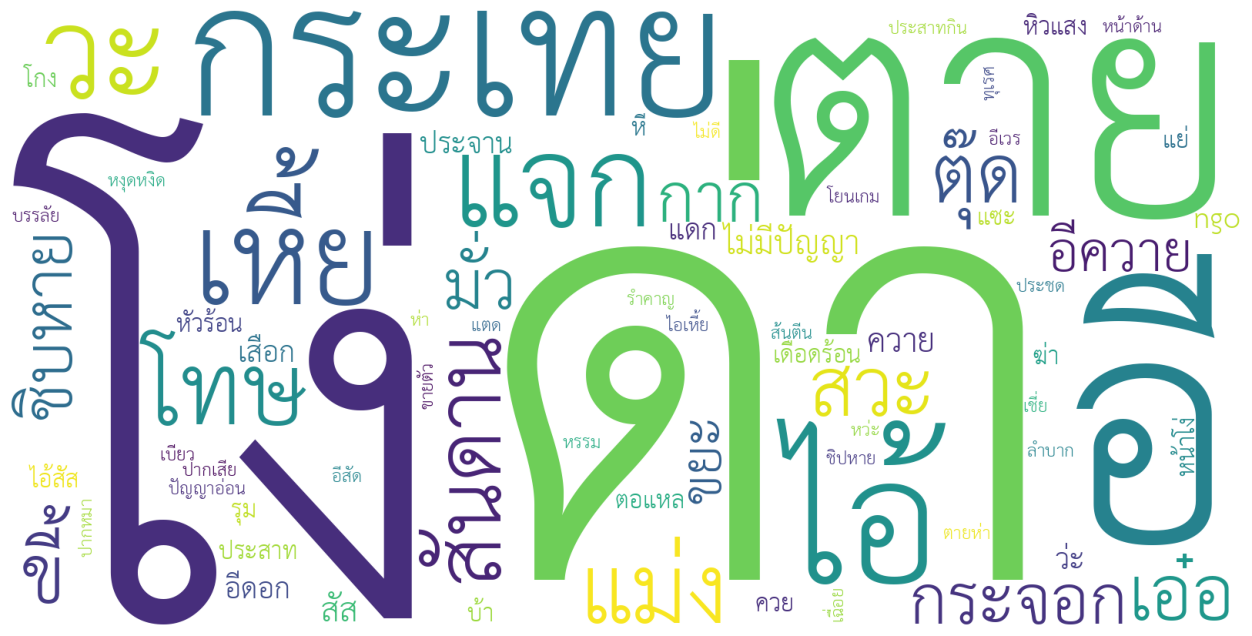

In [ ]:
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
stopwords = list(thai_stopwords())

df_neg = df[df['label_CutWord'] == 'neg']
neg_word_all = df_neg['ToxicWords'].explode()
wordcloud = WordCloud(font_path='thsarabunnew-webfont.ttf', width=1600, height=800,
                      regexp=r"[ก-๙a-zA-Z']+", background_color='white', stopwords=stopwords).generate(' '.join(neg_word_all))
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

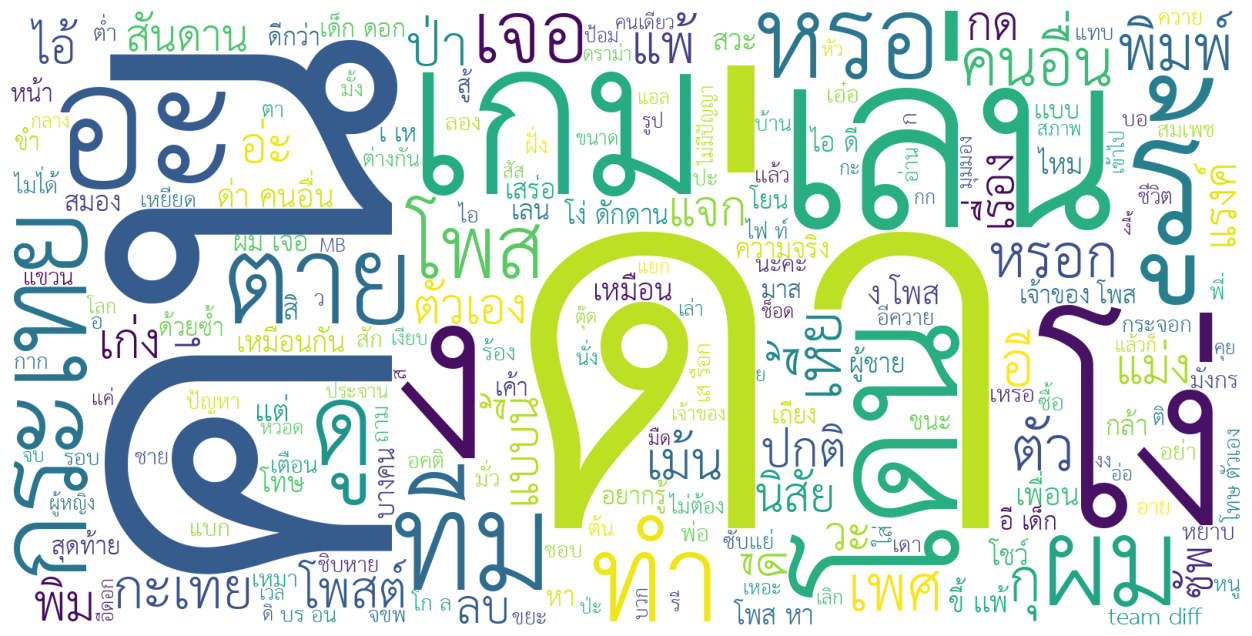

In [ ]:
stopwords.append('User')
df_neg = df[df['label_CutWord'] == 'neg']
neg_word_all = " ".join(text for text in df_neg['tokens'])
wordcloud = WordCloud(font_path='thsarabunnew-webfont.ttf', width=1600, height=800,
                      regexp=r"[ก-๙a-zA-Z']+", background_color='white', stopwords=stopwords).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

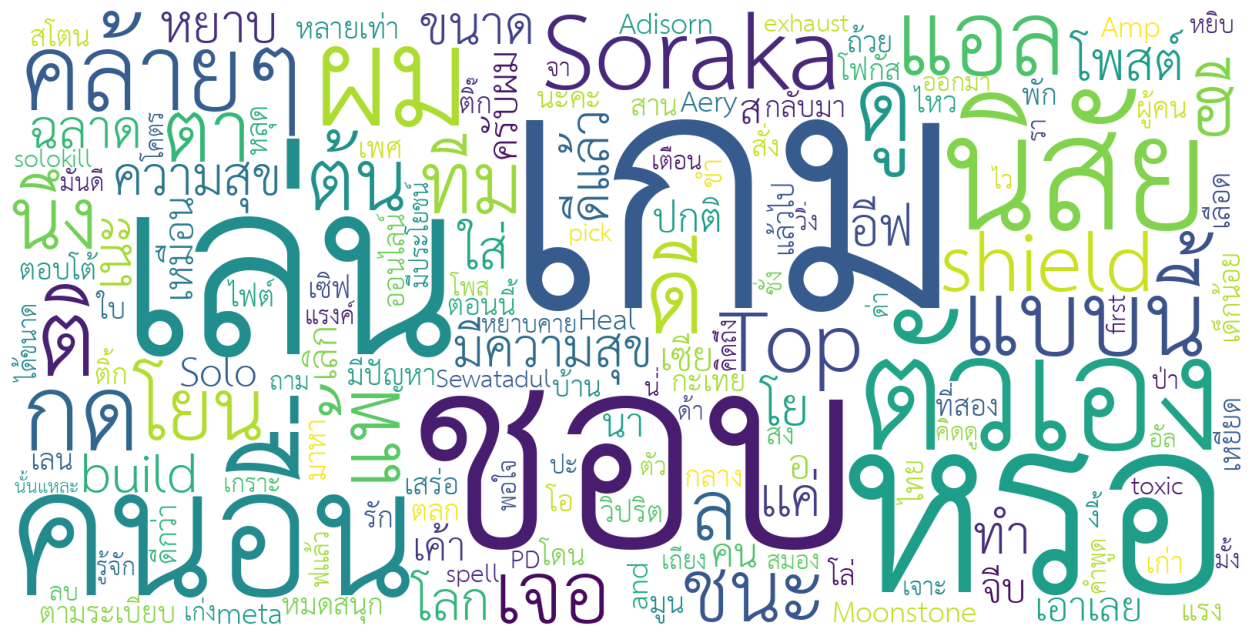

In [ ]:
df_pos = df[df['label_CutWord'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['tokens'])
wordcloud = WordCloud(font_path='thsarabunnew-webfont.ttf', width=1600, height=800,
                      regexp=r"[ก-๙a-zA-Z']+", background_color='white', stopwords=stopwords).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
sum(df['label'] == df['weight_label'])

322

In [ ]:
sum(df['label'] == df['weight_label']) / len(df['weight_label']) * 100

67.50524109014675

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

df['tokens'].fillna('', inplace=True)

# Create a TF-IDF vectorizer
vectorizer = CountVectorizer()

# Convert text data to feature vectors
X = vectorizer.fit_transform(df['tokens'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['weight_label'], test_size=0.3, random_state=42)

In [ ]:
# Create and train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on the testing set
y_pred = model_lr.predict(X_test)

In [ ]:
accuracy_lr_weight = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lr_weight)

Accuracy: 0.8263888888888888


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         neg       0.82      0.67      0.74        49
         neu       0.83      0.92      0.87        93
         pos       0.00      0.00      0.00         2

    accuracy                           0.83       144
   macro avg       0.55      0.53      0.54       144
weighted avg       0.81      0.83      0.82       144



In [ ]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier(verbose=False)
model_cb.fit(X_train, y_train)

In [ ]:
# Predict on the testing set
y_pred = model_cb.predict(X_test)

In [ ]:
accuracy_cb_weight = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_cb_weight)

Accuracy: 0.8333333333333334


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         neg       0.89      0.63      0.74        49
         neu       0.82      0.96      0.88        93
         pos       0.00      0.00      0.00         2

    accuracy                           0.83       144
   macro avg       0.57      0.53      0.54       144
weighted avg       0.83      0.83      0.82       144



In [ ]:
# Create and train the SVM classifier
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predict on the testing set
y_pred = model_svm.predict(X_test)

In [ ]:
accuracy_svm_weight = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm_weight)

Accuracy: 0.8263888888888888


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         neg       0.80      0.71      0.75        49
         neu       0.84      0.90      0.87        93
         pos       0.00      0.00      0.00         2

    accuracy                           0.83       144
   macro avg       0.55      0.54      0.54       144
weighted avg       0.81      0.83      0.82       144



In [ ]:
# def calculate_average_score(text, positive_words, negative_words):
#     words = text.lower().split(" ")
#     positive_count = 0
#     negative_count = 0

#     for word in words:
#         if word in positive_words:
#             positive_count += positive_words[word]
#     for word in words:
#         if word in negative_words:
#             negative_count += negative_words[word]

#     total_score = positive_count - negative_count

#     # นับจำนวนคำทั้งหมด
#     total_words = len(words)

#     # หาคะแนนเฉลี่ย
#     if total_words > 0:
#         average_score = total_score / total_words
#     else:
#         average_score = 0  # ป้องกันการหารด้วยศูนย์

#     return average_score

# scores = []
# for d in df['tokens']:
#     score = calculate_average_score(d, positive_dict, negative_dict)
#     scores.append(score)


In [ ]:
df_accu = pd.DataFrame(dict(Model=['Logistic Regression',
                              'SVM',
                              'CatBoost'],
                            BagOfWordAccuracy=[round(accuracy_lr_cut*100, 2), round(accuracy_svm_cut*100, 2),
                                               round(accuracy_cb_cut*100, 2)],
                            WeightScoreAccuracy=[round(accuracy_lr_weight*100, 2), round(accuracy_svm_weight*100, 2),
                                               round(accuracy_cb_weight*100, 2)]))
df_accu

,Model,BagOfWordAccuracy,WeightScoreAccuracy
0,Logistic Regression,80.56,82.64
1,SVM,78.47,82.64
2,CatBoost,81.94,83.33


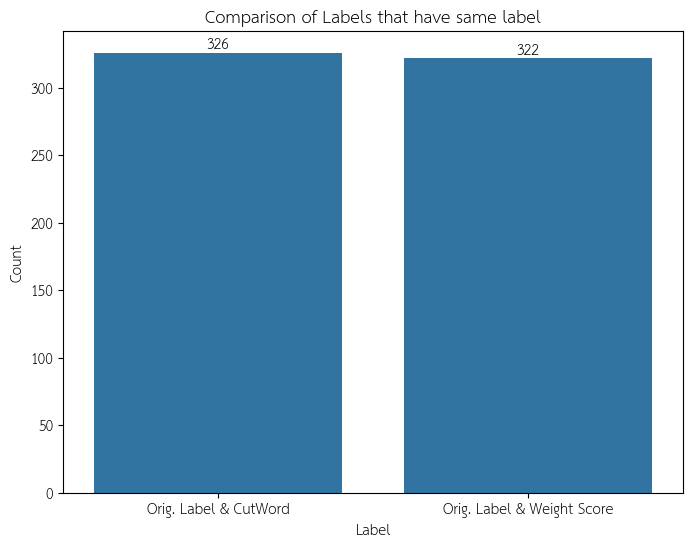

In [ ]:
count_all_label = [sum(df['label'] == df['label_CutWord']),
                   sum(df['label'] == df['weight_label'])]
labels = ['Orig. Label & CutWord', 'Orig. Label & Weight Score']

plt.figure(figsize=(8,6))
ax = sns.barplot(x=labels, y=count_all_label)

for i, v in enumerate(count_all_label):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Comparison of Labels that have same label')
plt.show()

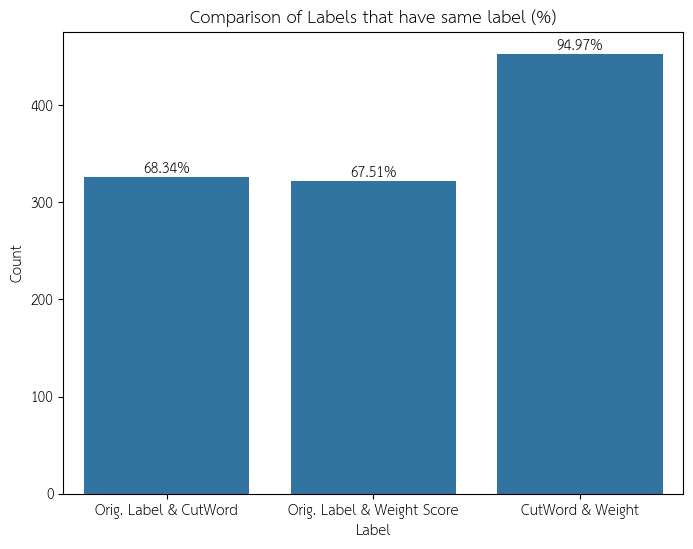

In [ ]:
count_all_label = [sum(df['label'] == df['label_CutWord']),
                   sum(df['label'] == df['weight_label']),
                   sum(df['label_CutWord'] == df['weight_label'])]
labels = ['Orig. Label & CutWord', 'Orig. Label & Weight Score', 'CutWord & Weight']

plt.figure(figsize=(8,6))
ax = sns.barplot(x=labels, y=count_all_label)

# คำนวณเปอร์เซ็น
for i, v in enumerate(count_all_label):
    ax.text(i, v, f'{(v / len(df)) * 100:.2f}%', ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Comparison of Labels that have same label (%)')
plt.show()


In [ ]:
pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pyvis
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
pip install networkx --upgrade

In [ ]:
from collections import Counter
import pandas as pd
from pyvis.network import Network

# Assuming you have a DataFrame named df with columns "author", "target", and "label"

# Separate data into lists
authors = list(df["author"])
targets = list(df["target"])
labels = list(df["weight_label"])

# Use Counter to count occurrences of author-target pairs
edge_counts = Counter(zip(authors, targets, labels))

# Create a pyvis network
net = Network(height="750px", width="100%", notebook=True)

# Add nodes to the network
for author in authors:
    net.add_node(author, label=author)

# Add edges to the network, skipping NaN values

for (author, target, label), count in edge_counts.items():
    if pd.notna(target):  # Check for NaN
        # Define a color based on the label
        color = None
        if label == 'neg':
            color = 'red'
        elif label == 'pos':
            color = 'green'
        elif label == 'neu':
            color = 'grey'

        # Use count as the value for the edge width
        # Add the arrows attribute to create arrowheads
        net.add_edge(author, target, value=count, color=color, arrows="to", width=3, head_width=2, length_includes_head=True)
        net.add_edge(target, author, value=count, color=color, arrows="from", width=3, head_width=2, length_includes_head=True)

# Show the network
net.show("network_loldrama.html")

with open("network_loldrama.html", "a") as file:
    file.write("""
    <!-- Legend Section -->
    <div style="text-align: center; padding: 10px;">
        <div style="display: inline-block; margin-right: 20px;">
            <div style="width: 20px; height: 20px; background-color: green; display: inline-block;"></div>
            <span style="margin-left: 5px; font-size: 14px;">Positive</span>
        </div>
        <div style="display: inline-block; margin-right: 20px;">
            <div style="width: 20px; height: 20px; background-color: red; display: inline-block;"></div>
            <span style="margin-left: 5px; font-size: 14px;">Negative</span>
        </div>
        <div style="display: inline-block;">
            <div style="width: 20px; height: 20px; background-color: grey; display: inline-block;"></div>
            <span style="margin-left: 5px; font-size: 14px;">Neutral</span>
        </div>
    </div>

    """)


network_loldrama.html
